In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/d51iMGfp_t0QpO30Lym-dw/automobile-sales.csv"
df=pd.read_csv(URL)
print('Dataframe created')

Dataframe created


In [4]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


In [19]:
len(df['Advertising_Expenditure'])

2112

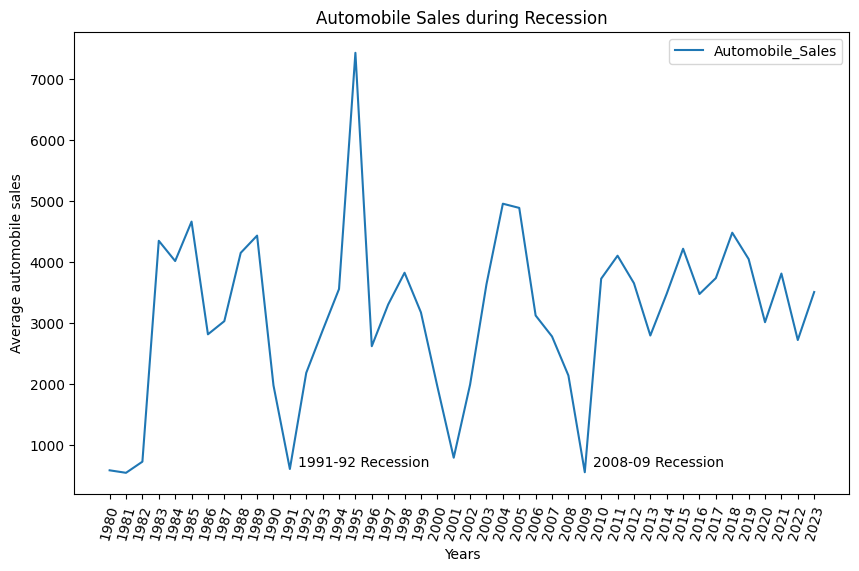

In [6]:
df1=df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
ax=df1.plot(kind='line')
ax.set_xlabel('Years')
ax.set_ylabel('Average automobile sales')
ax.set_title('Automobile Sales during Recession')
plt.xticks(list(range(1980,2024)), rotation = 75)
ax.text(1991.5, 650, '1991-92 Recession')
ax.text(2009.5, 650, '2008-09 Recession')
ax.legend()
plt.show()

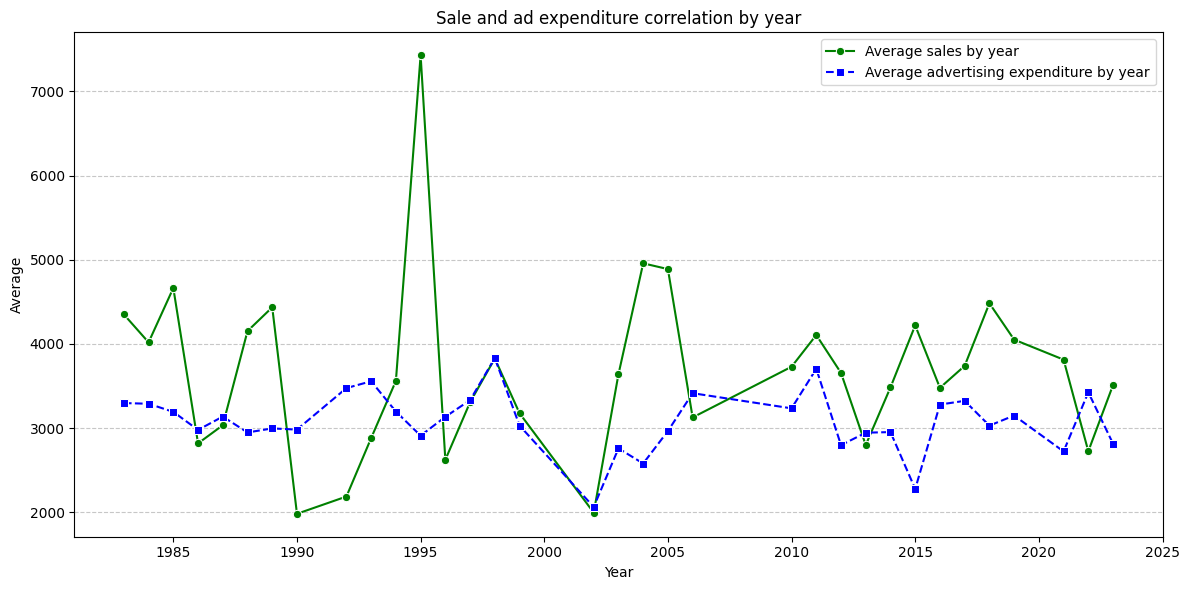

In [7]:
df_nonrec=df[df['Recession']==0]
df2=df_nonrec.groupby('Year', as_index=False).agg(Avg_sales=('Automobile_Sales', 'mean'), Avg_ad_exp=('Advertising_Expenditure', 'mean'))
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='Year', y='Avg_sales', marker='o', linestyle='-', color='green', label='Average sales by year')
sns.lineplot(data=df2, x='Year', y='Avg_ad_exp', marker='s', linestyle='--', color='blue', label='Average advertising expenditure by year')

plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Sale and ad expenditure correlation by year')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

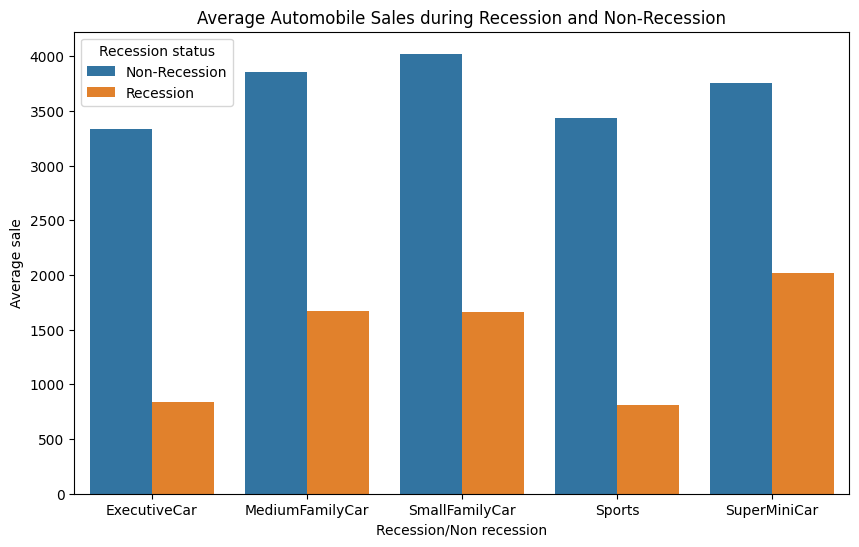

In [8]:
new_df = df.groupby(['Vehicle_Type', 'Recession'])['Automobile_Sales'].mean().reset_index()
new_df['Recession_Label'] = new_df['Recession'].map({0: 'Non-Recession', 1: 'Recession'})
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession_Label',  data=new_df)
plt.xlabel('Recession/Non recession')
plt.ylabel('Average sale')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.legend(title='Recession status')
plt.show()

In [9]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


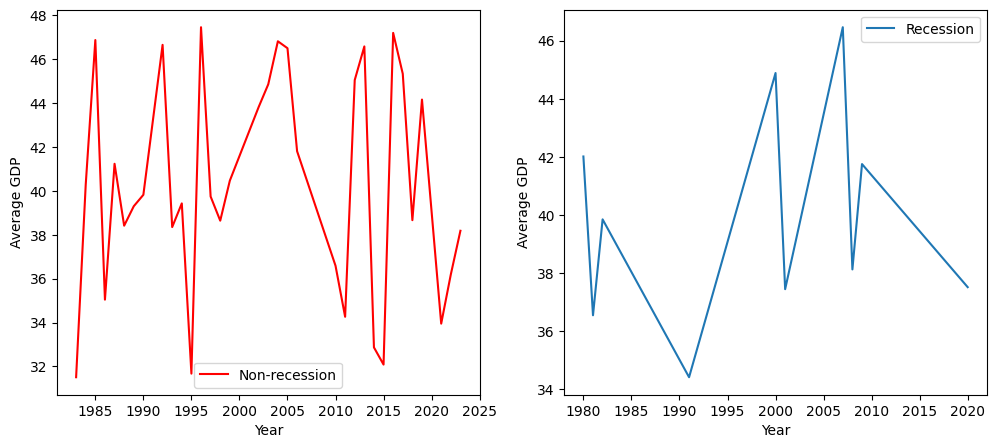

In [10]:
df_rec=df[df['Recession']==1]
nonrec_df=df[df['Recession']==0]
df_rec=df_rec.groupby('Year')['GDP'].mean().reset_index()
nonrec_df=nonrec_df.groupby('Year')['GDP'].mean().reset_index()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.lineplot(data=nonrec_df, x='Year', y='GDP', label='Non-recession', color='r')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.legend()

plt.subplot(1,2,2)
sns.lineplot(data=df_rec, x='Year', y='GDP', label='Recession')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.legend()


plt.show()

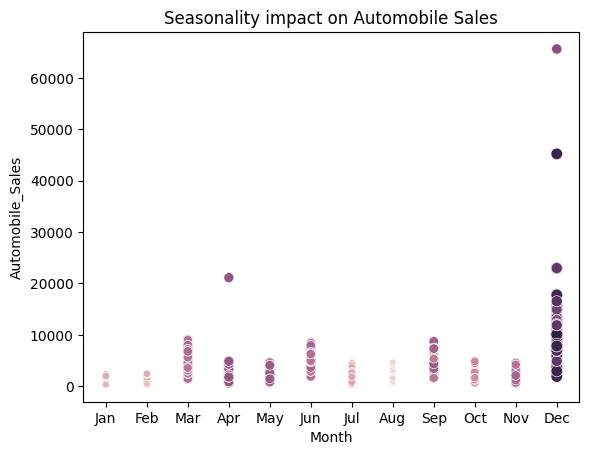

In [11]:
non_rec_data=df[df['Recession']==0]
size=non_rec_data['Seasonality_Weight']
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

In [12]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York


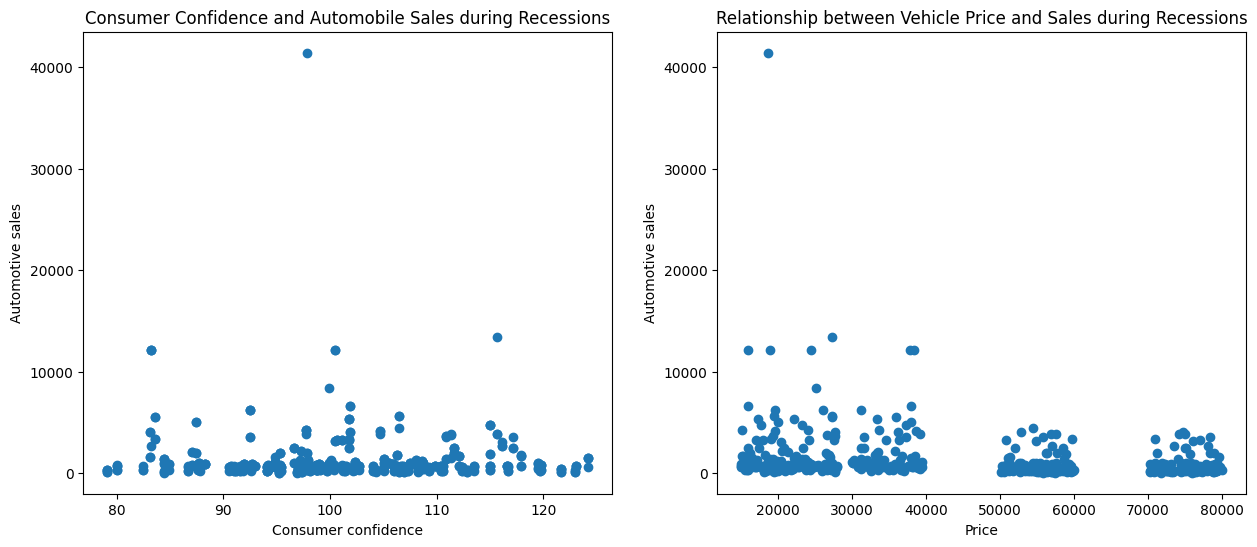

In [13]:
rec_data=df[df['Recession']==1]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.xlabel('Consumer confidence')
plt.ylabel('Automotive sales')

plt.subplot(1,2,2)
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.title('Relationship between Vehicle Price and Sales during Recessions')
plt.xlabel('Price')
plt.ylabel('Automotive sales')
plt.show()

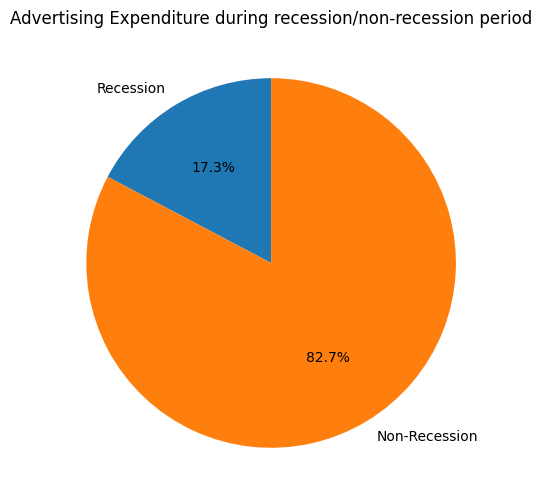

In [14]:
Rec_total = rec_data['Advertising_Expenditure'].sum()
Non_rec_total = non_rec_data['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [Rec_total, Non_rec_total]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during recession/non-recession period')

plt.show()

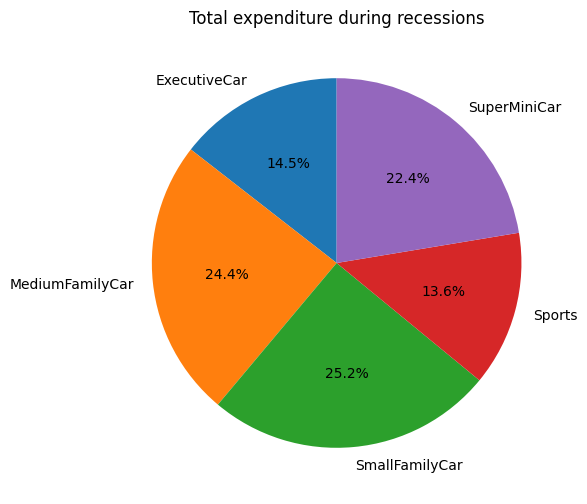

In [15]:
rec_data_vtype=rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
Types=rec_data_vtype['Vehicle_Type']
plt.figure(figsize=(10,6))
plt.pie(rec_data_vtype['Advertising_Expenditure'], labels=Types, autopct='%1.1f%%', startangle=90)
plt.title('Total expenditure during recessions')
plt.show()

In [16]:
rec_data.head(10)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.45,27704,1417.5,7,60.22,0.01,5.4,220.0,SmallFamilyCar,Georgia
1,1980-01-31,1980,Jan,1,108.24,0.45,77270,763.7,7,60.22,0.01,5.4,72.0,Sports,Georgia
2,1980-01-31,1980,Jan,1,108.24,0.36,19665,1417.5,7,60.22,0.01,5.4,238.0,SuperMiniCar,Georgia
3,1980-01-31,1980,Jan,1,108.24,0.38,36986,1417.5,7,60.22,0.01,5.4,224.0,MediumFamilyCar,Georgia
4,1980-02-29,1980,Feb,1,98.75,0.46,26609,2773.4,4,45.99,-0.31,4.8,280.0,SmallFamilyCar,New York
5,1980-02-29,1980,Feb,1,98.75,0.36,18963,2773.4,4,45.99,-0.31,4.8,266.0,SuperMiniCar,New York
6,1980-02-29,1980,Feb,1,98.75,0.39,33517,2773.4,4,45.99,-0.31,4.8,266.0,MediumFamilyCar,New York
7,1980-03-31,1980,Mar,1,107.48,0.85,33735,2854.6,3,35.14,-0.31,3.4,967.1,MediumFamilyCar,New York
8,1980-03-31,1980,Mar,1,107.48,0.86,70860,1537.2,3,35.14,-0.31,3.4,967.1,Sports,New York
9,1980-03-31,1980,Mar,1,107.48,0.87,52479,1537.2,3,35.14,-0.31,3.4,967.1,ExecutiveCar,New York


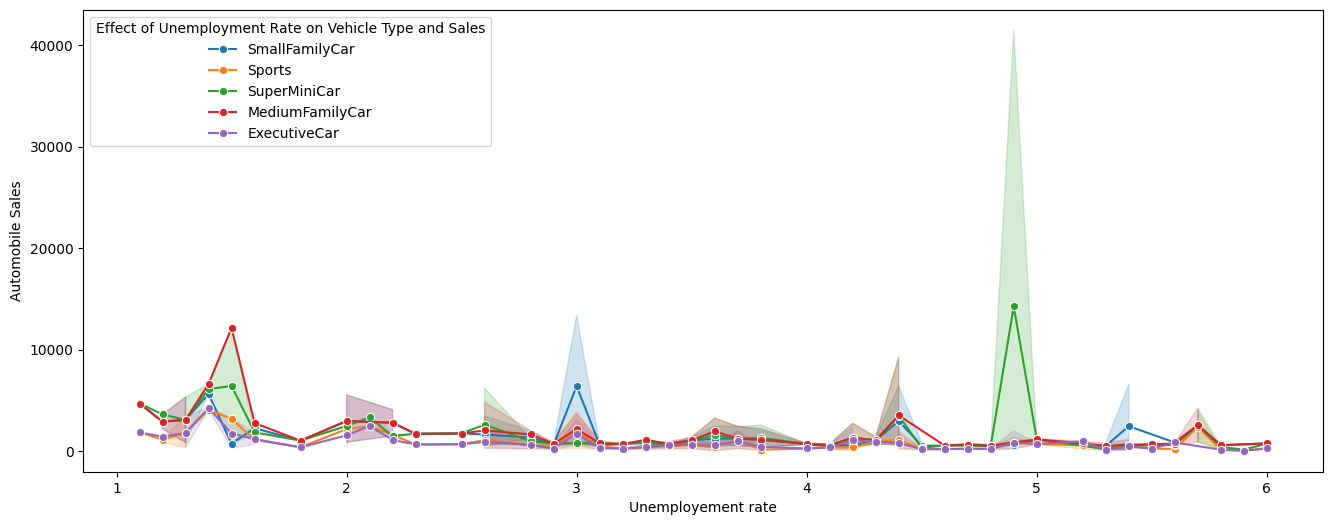

In [17]:
rec_data #recession dataframe
plt.figure(figsize=(16,6))
sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o')
plt.legend(title='Effect of Unemployment Rate on Vehicle Type and Sales')
plt.xlabel('Unemployement rate')
plt.ylabel('Automobile Sales')

plt.show()

In [18]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
# Calculate the total sales by city
sales_by_city = rec_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
choropleth = folium.Choropleth(
        geo_data= path,  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
map1